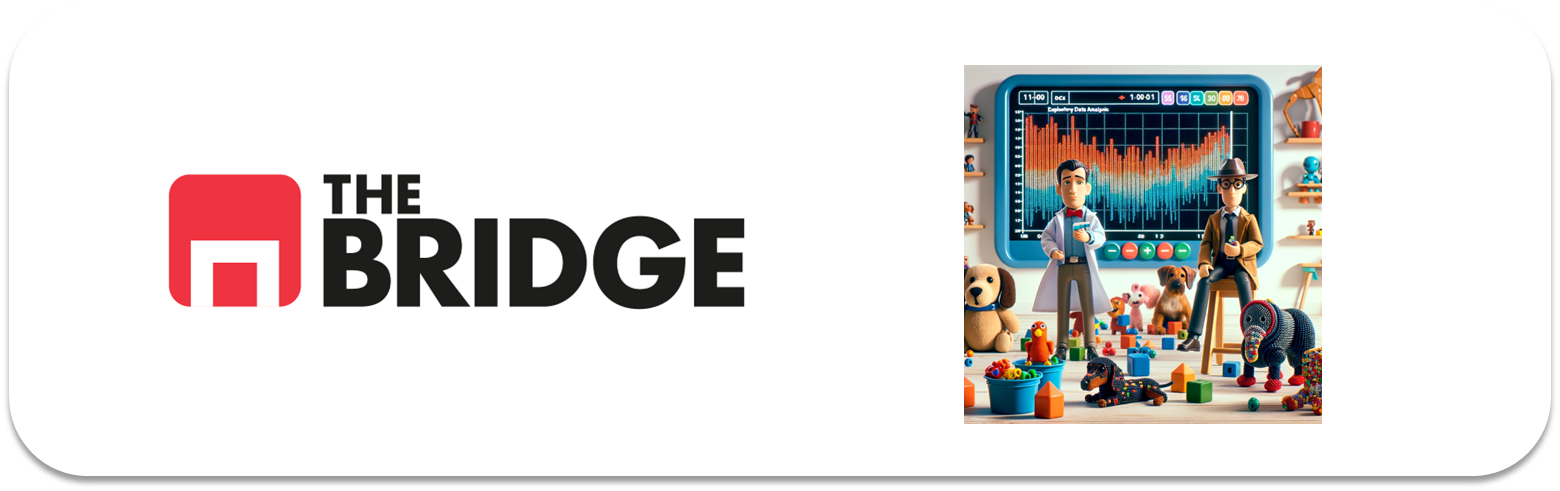

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Imports del workout

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import pearsonr



## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [ ]:
# Cargamos el dataset en un df
df_titanic = pd.read_csv("./data/titanic.csv")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [ ]:
# Eliminamos las columnas innecesarias
df_titanic.drop(columns = ["deck", "survived", "pclass", "embarked"], inplace = True)

df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
# Family members y eliminar parck y sibsp
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

df_titanic.drop(columns = ["parch", "sibsp"], inplace = True)

df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
# cambiar los valores nulos de embark town
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic.embark_town.mode()[0])
df_titanic.embark_town.value_counts(dropna = False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# rellenar las edades que faltan con la media teniendo en cuenta who
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"

media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

df_titanic.age.value_counts(dropna = False)

age
33.173123    124
32.000000     71
24.000000     30
22.000000     27
18.000000     26
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos y en relativos, sobrevivieron más mujeres. Hay una relación estadísticamente significativa entre el sexo y la supervivencia.

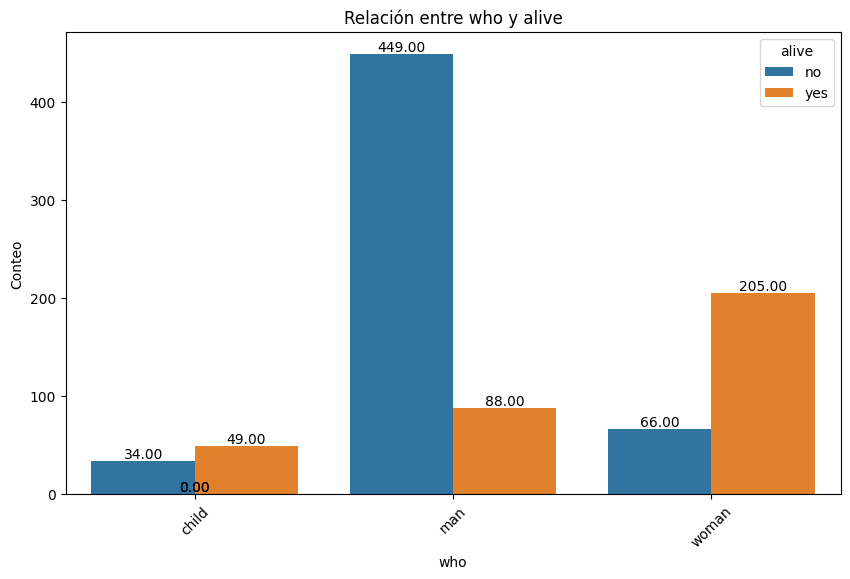

In [34]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

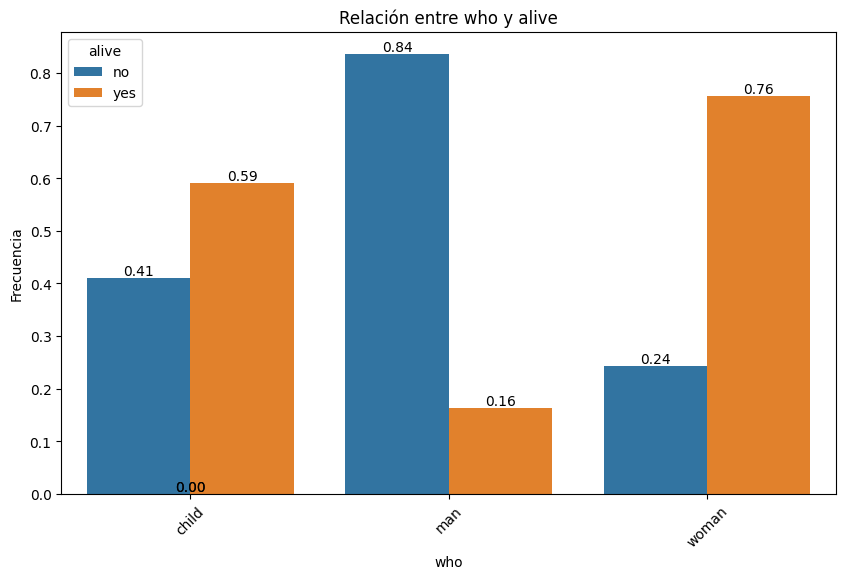

In [35]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True, relative_freq = True)

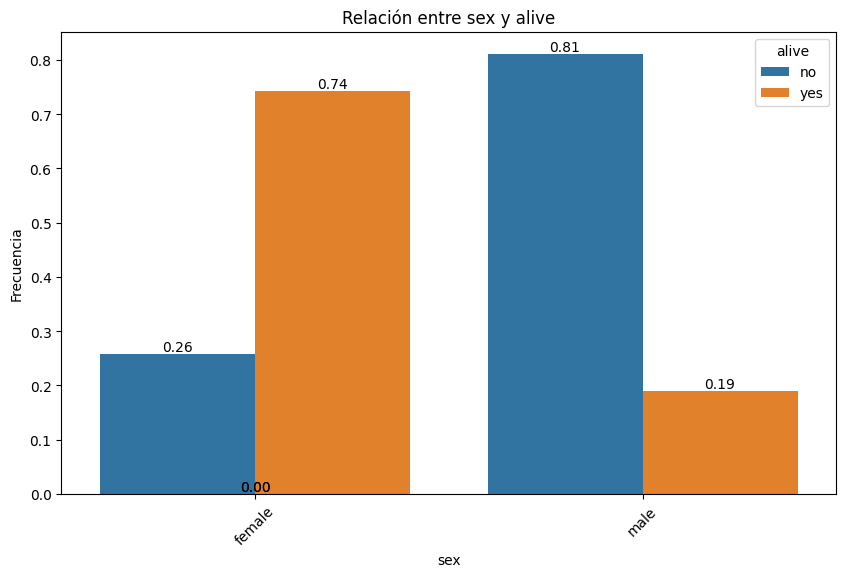

In [37]:
plot_categorical_relationship_fin(df_titanic, "sex","alive", show_values= True, relative_freq = True)

In [38]:
tabla_contingencia_sex = pd.crosstab(df_titanic['alive'], df_titanic['sex'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_sex)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


2. En términos absolutos, sobrevivieron más de primera clase. En términos relativos también. Es estadísticamente significativo.

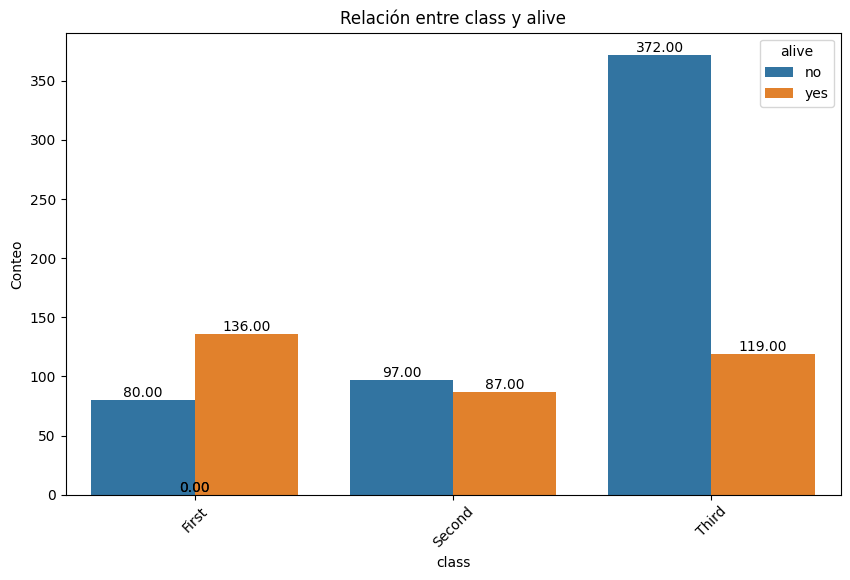

In [39]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values= True)

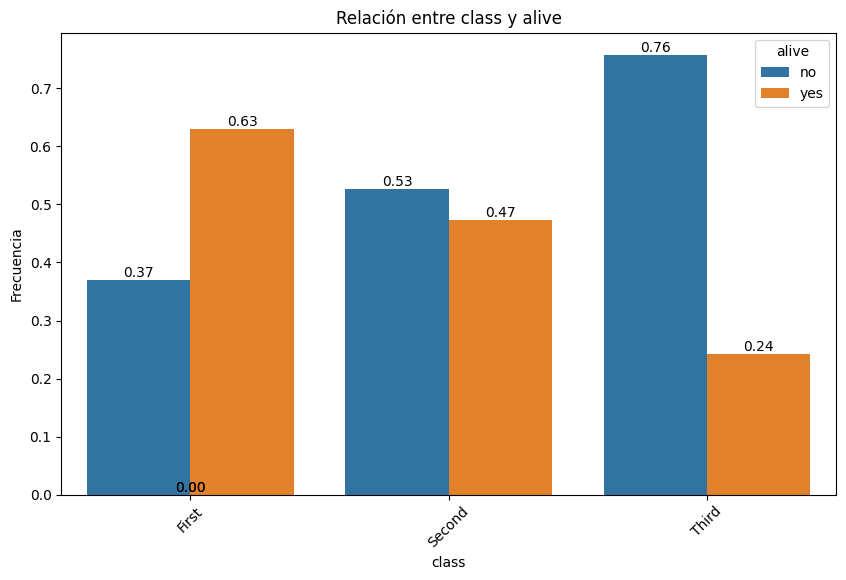

In [40]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values= True, relative_freq = True)

In [41]:
tabla_contingencia_class = pd.crosstab(df_titanic['class'], df_titanic['sex'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_class)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 16.971499095517114
P-Value: 0.00020638864348233114
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 76.12121212 139.87878788]
 [ 64.84399551 119.15600449]
 [173.03479237 317.96520763]]


3. En términos absolutos, sobrevivieron más personas de Southampton. En términos relativos, Cherbourg. La relación es estadísticamente significativa.

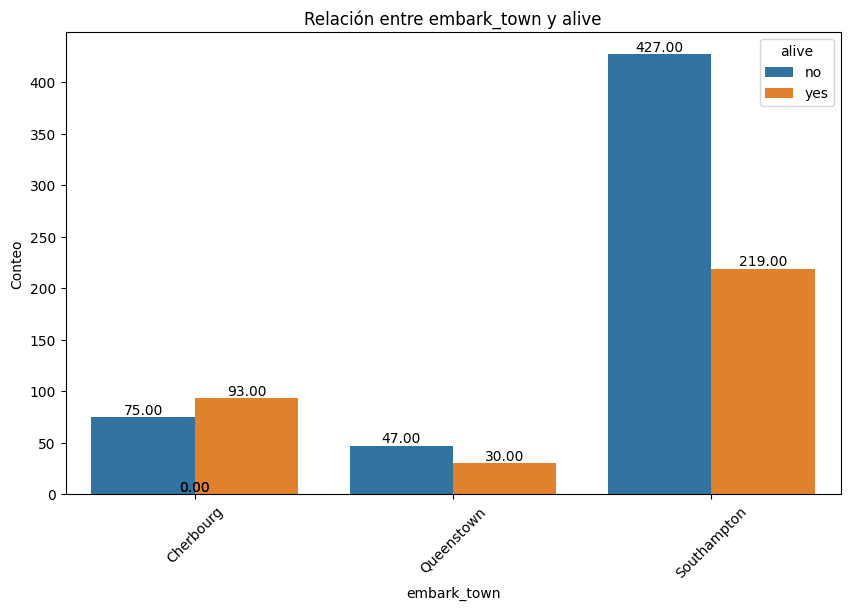

In [42]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

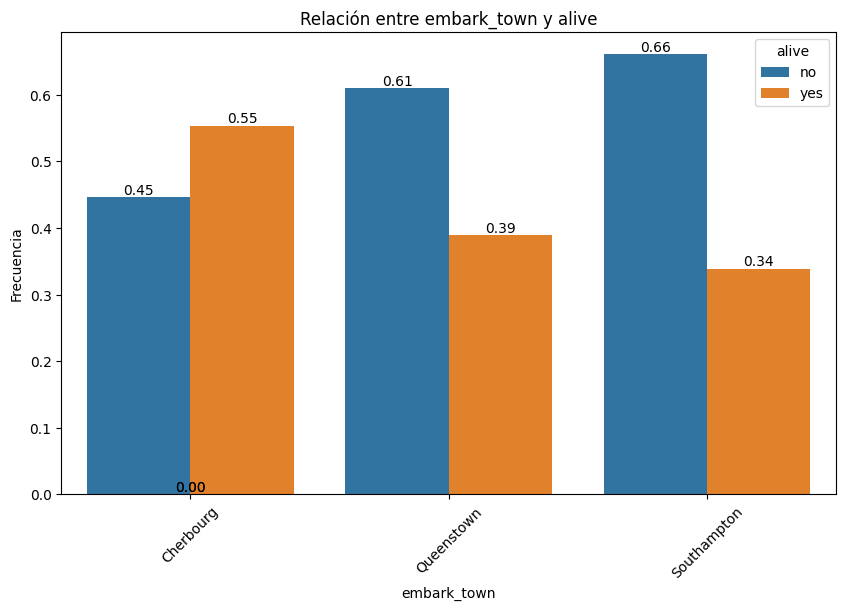

In [43]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True, relative_freq = True)

In [44]:
tabla_contingencia_town = pd.crosstab(df_titanic['embark_town'], df_titanic['sex'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_town)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 12.91702420065256
P-Value: 0.00156712570238841
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 59.20538721 108.79461279]
 [ 27.13580247  49.86419753]
 [227.65881033 418.34118967]]


4. Se ve que los que sobreviven habían pagado más. Es estadísticamente significativo.

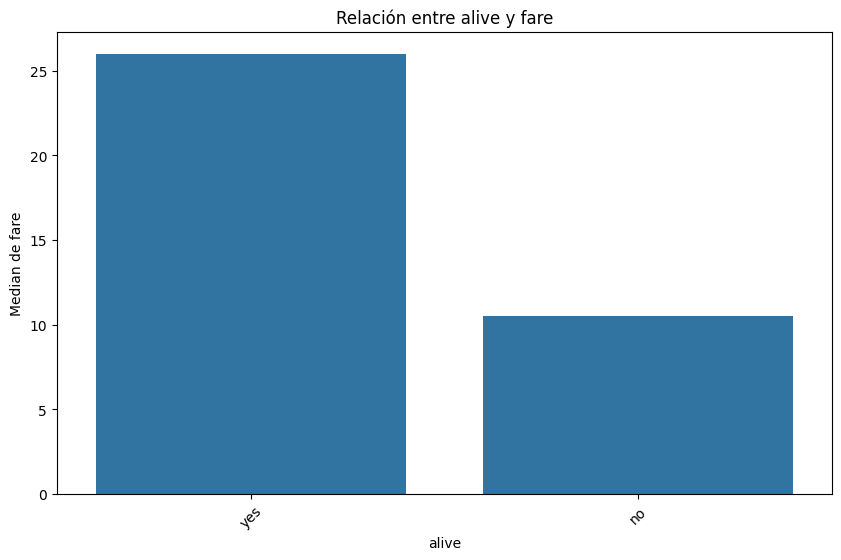

In [45]:
plot_categorical_numerical_relationship(df_titanic,"alive","fare", measure = "median")

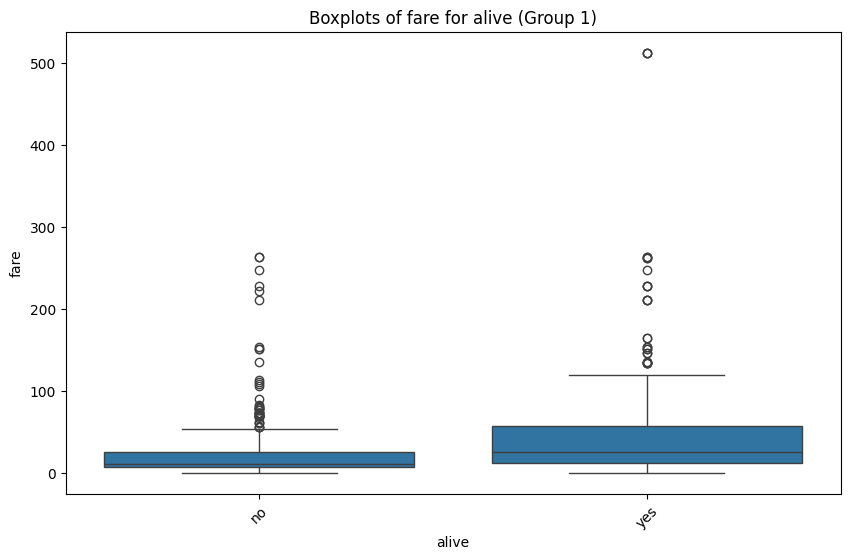

In [46]:
plot_grouped_boxplots(df_titanic,"alive","fare")

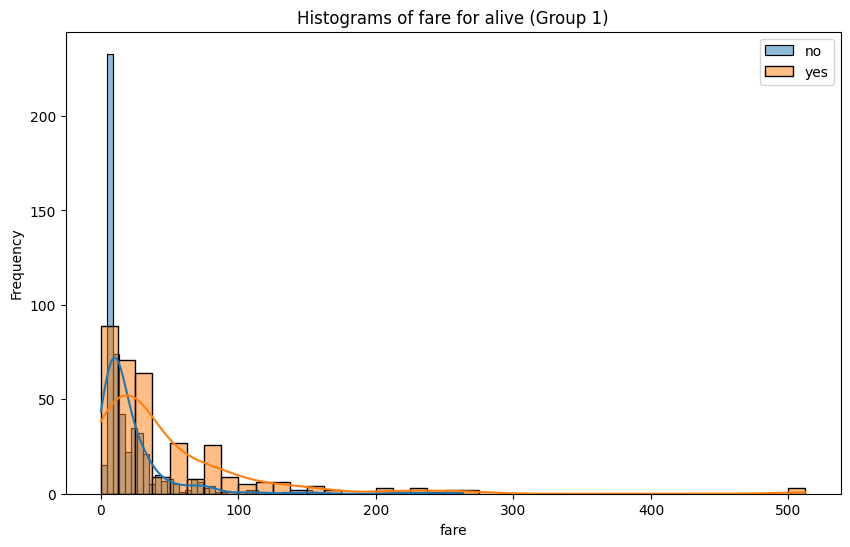

In [47]:
plot_grouped_histograms(df_titanic,"alive", "fare",2)

In [62]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


5. Se muestran las personas que no pagaron: hombres adultos que salieron desde southampton que iban solos. Las tres personas que más pagaron sobrevivieron, como era de esperar.

In [53]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [56]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


6. A pesar de que la mayoría salían de Southampton, los billetes de Cherbourg eran más caros, tanto para supervivientes, como para los que no.

In [67]:
grupo_yes = df_titanic.loc[df_titanic.alive == "yes"][["fare","embark_town"]]
grupo_no = df_titanic.loc[df_titanic.alive == "no"][["fare","embark_town"]]


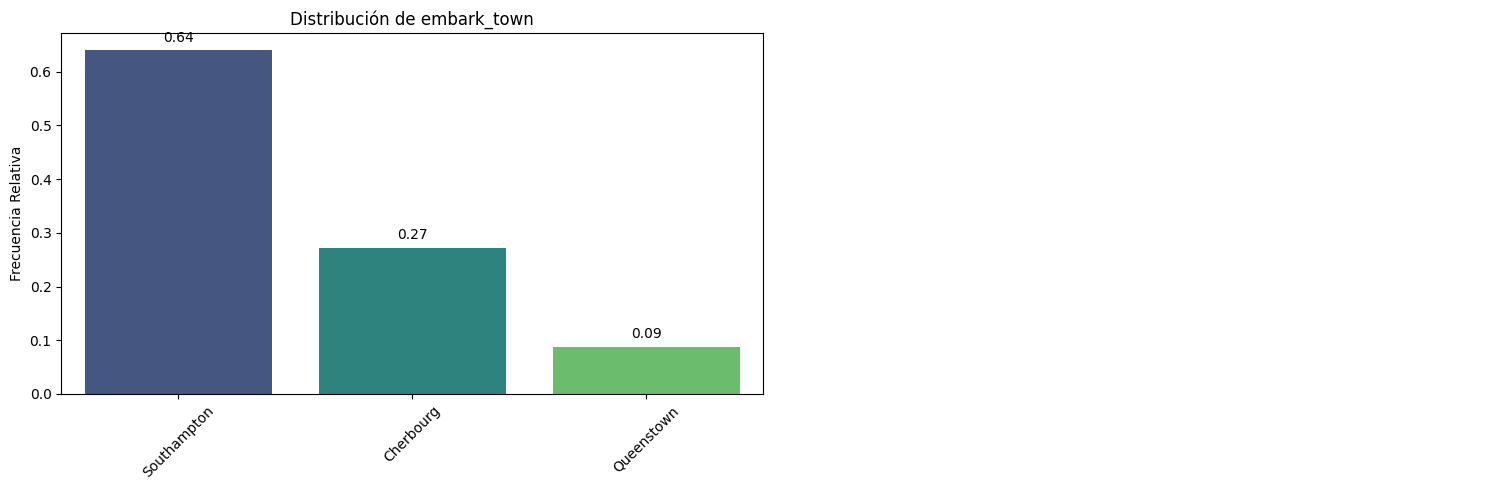

In [70]:
pinta_distribucion_categoricas(grupo_yes,["embark_town"], relativa= True, mostrar_valores= True)

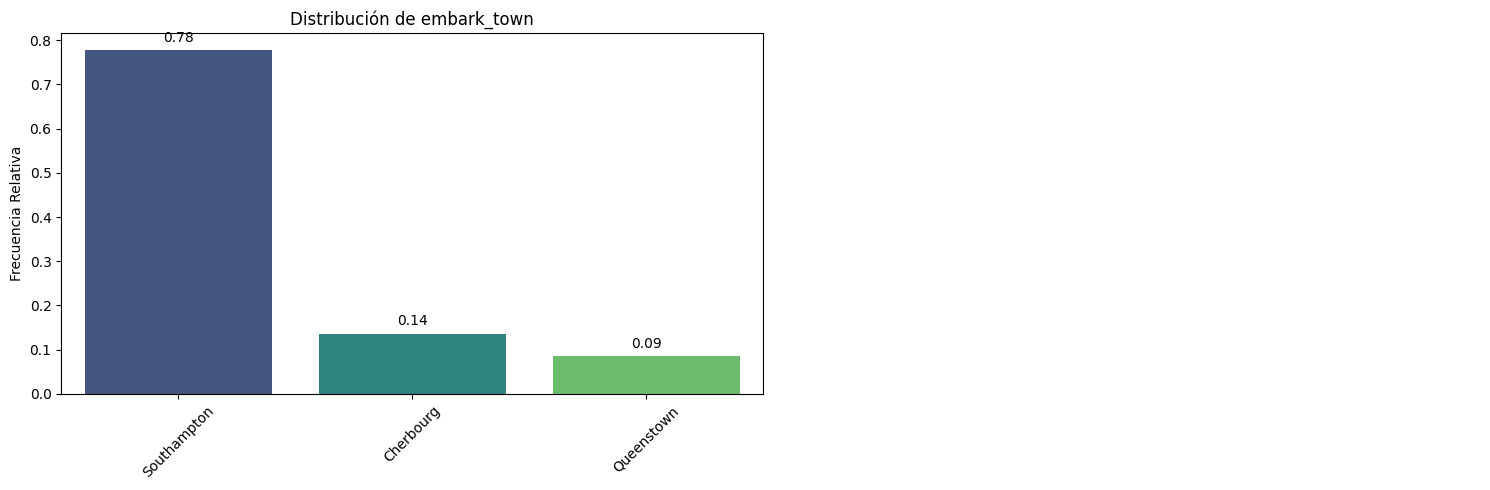

In [71]:
pinta_distribucion_categoricas(grupo_no,["embark_town"], relativa= True, mostrar_valores= True)

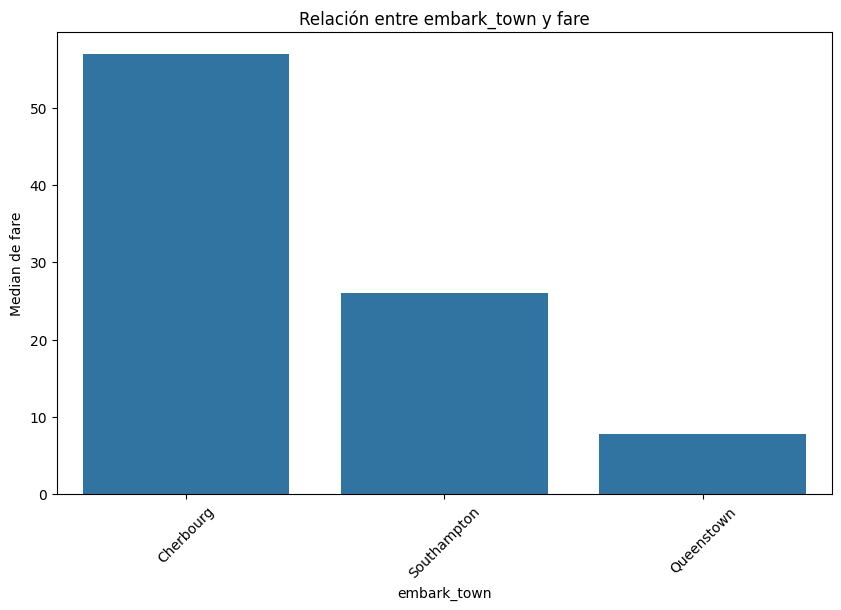

In [68]:
plot_categorical_numerical_relationship(grupo_yes,"embark_town","fare", measure = "median")

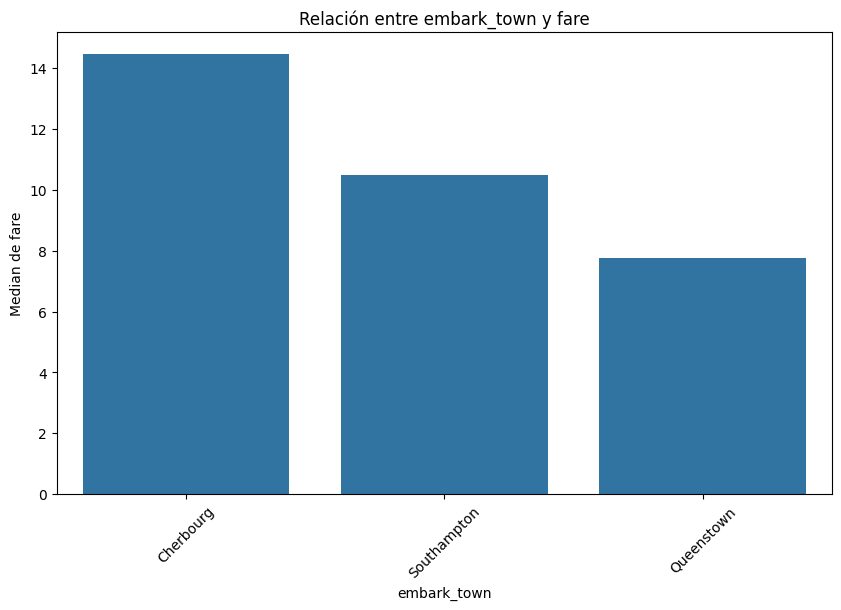

In [69]:
plot_categorical_numerical_relationship(grupo_no,"embark_town","fare", measure = "median")

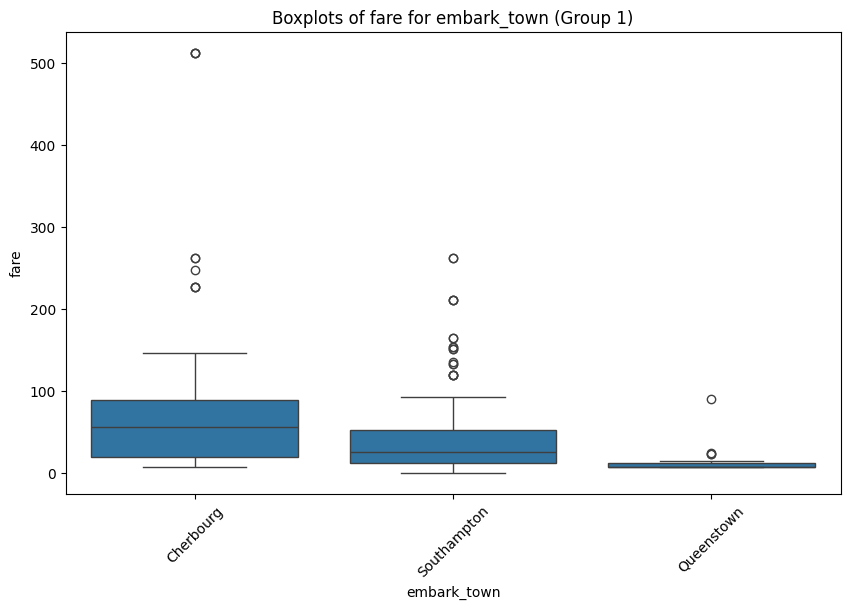

In [75]:
plot_grouped_boxplots(grupo_yes,"embark_town","fare")

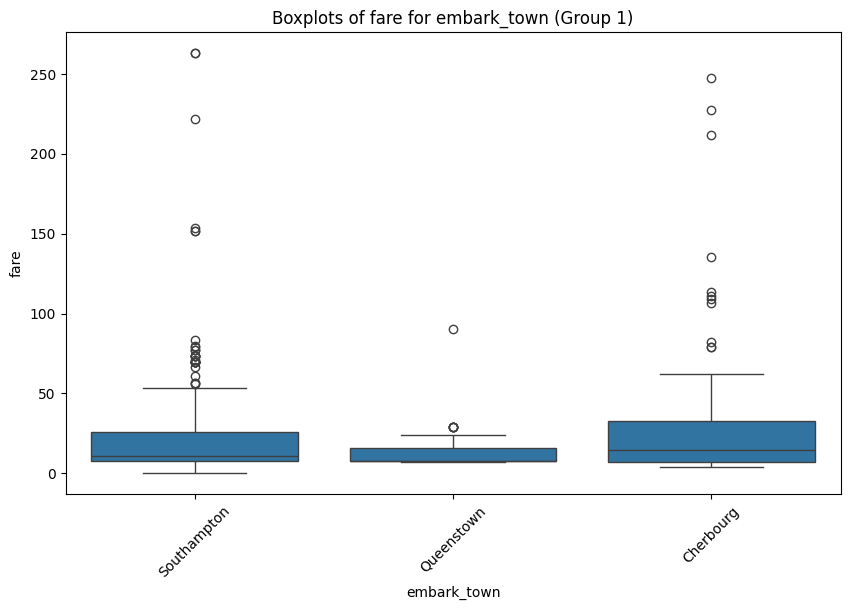

In [76]:
plot_grouped_boxplots(grupo_no,"embark_town","fare")

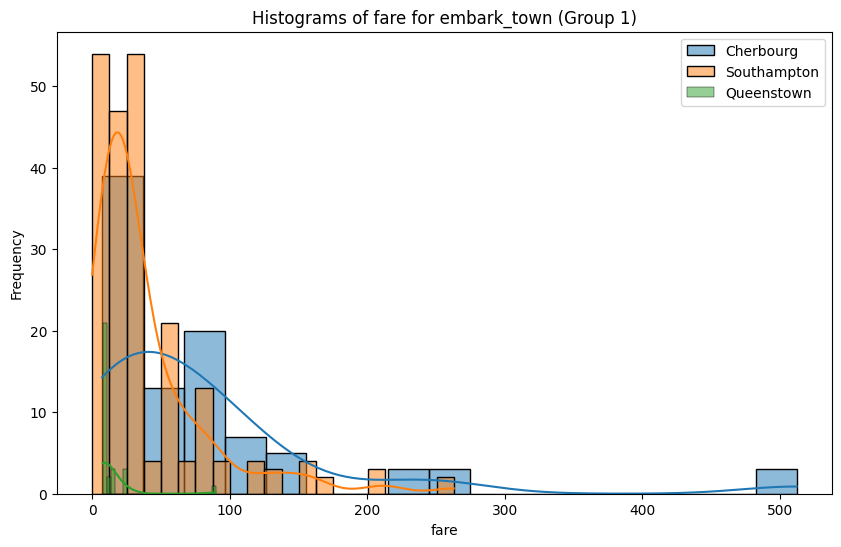

In [77]:
plot_grouped_histograms(grupo_yes,"embark_town", "fare", 5)

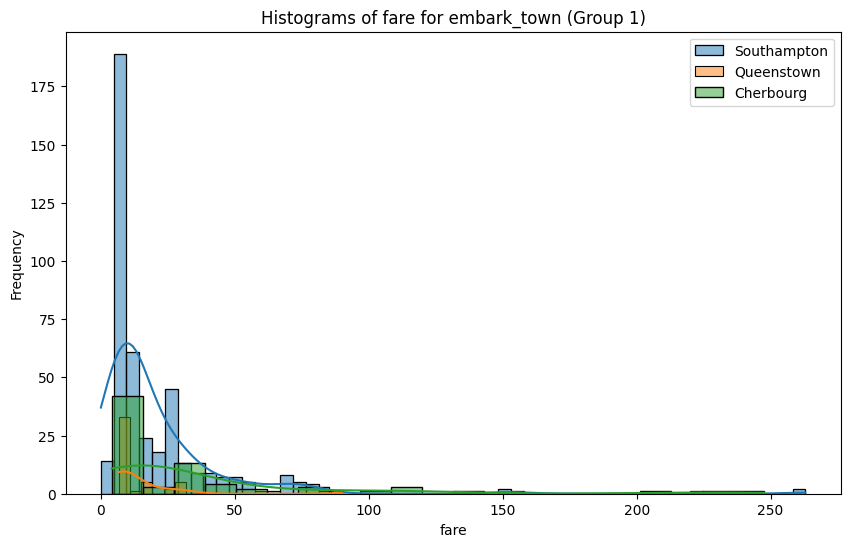

In [78]:
plot_grouped_histograms(grupo_no,"embark_town", "fare", 5)

7. Sobrevivieron más de primera clase (ya resuelto). Por la edad no se podría decir, tienen prácticamente la misma distribución, pero estadísticamente sí tienen relación significativa, p-value<0.05

(2,)


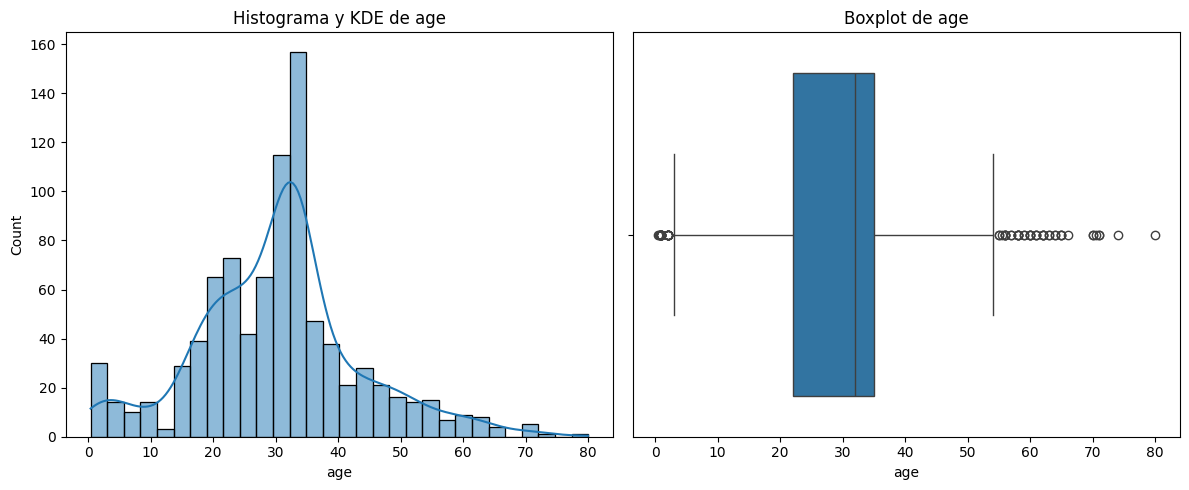

In [73]:
plot_combined_graphs(df_titanic,["age"])

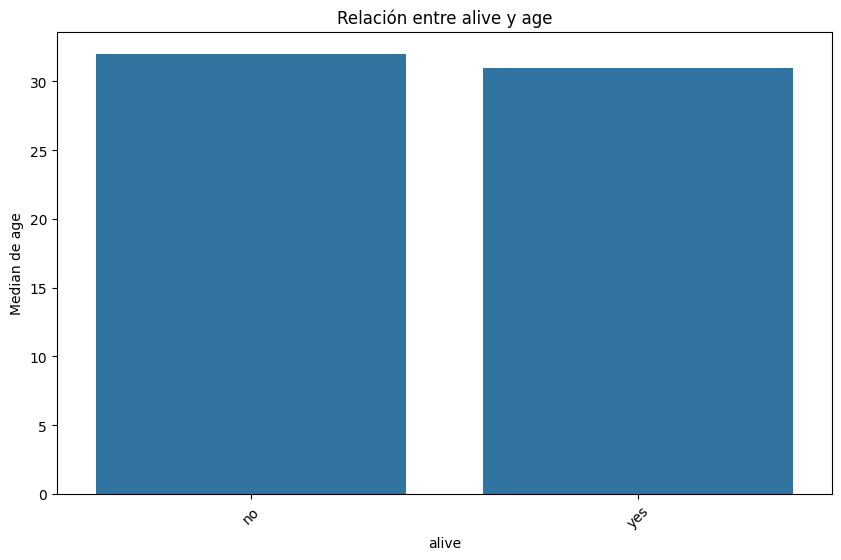

In [79]:
plot_categorical_numerical_relationship(df_titanic, "alive","age",measure="median") # Utilizando mediana

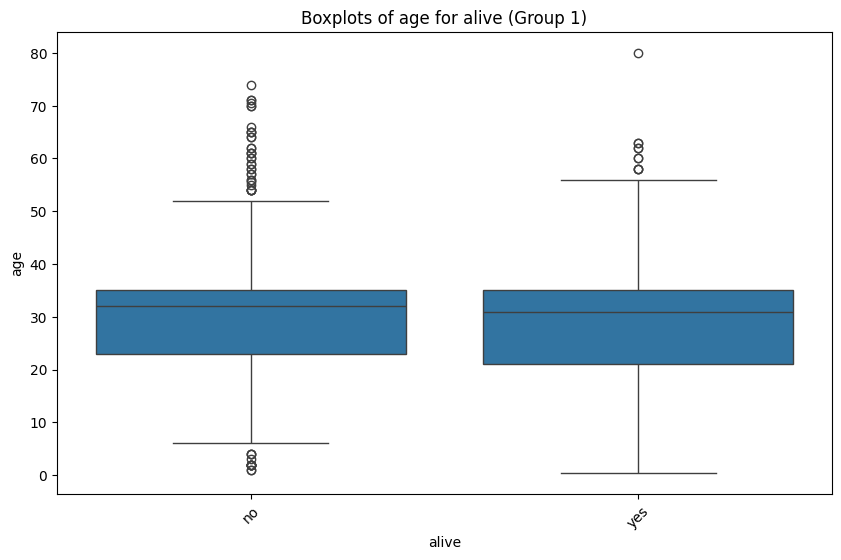

In [80]:
plot_grouped_boxplots(df_titanic,"alive","age")

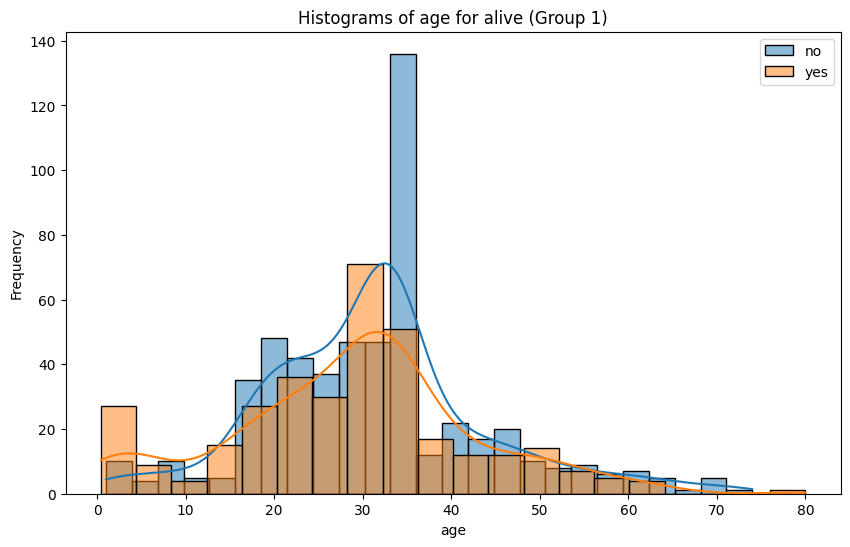

In [81]:
plot_grouped_histograms(df_titanic,"alive", "age", 5)

In [82]:
grupos = df_titanic['alive'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [df_titanic[df_titanic['alive'] == grupo]['age'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*ingresos_por_company) 
print("Valor F:", f_val)
print("Valor p:", p_val)


Valor F: 6.094041455991172
Valor p: 0.013750969626760786


8. La edad y el coste no tienen correlación con la supervivencia.

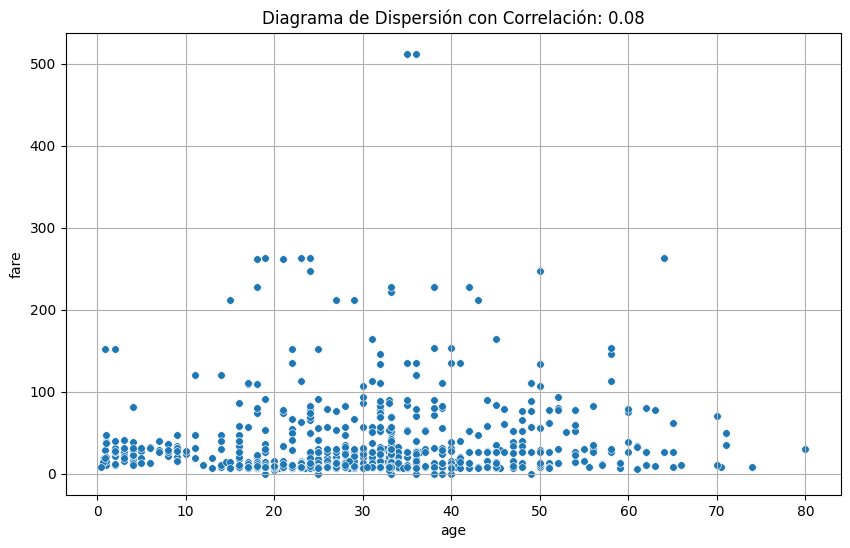

In [83]:
grafico_dispersion_con_correlacion(df_titanic,"age", "fare", mostrar_correlacion= True, tamano_puntos= 30)

Respuesta no:


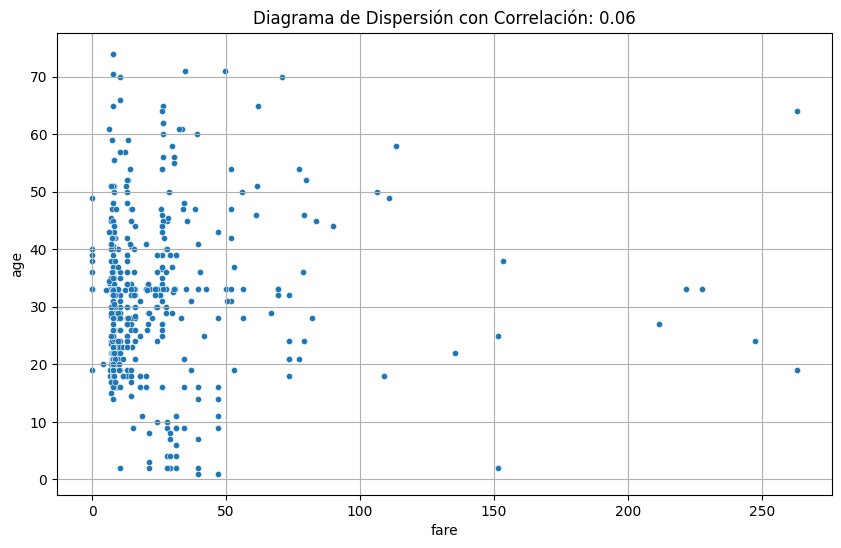

Respuesta yes:


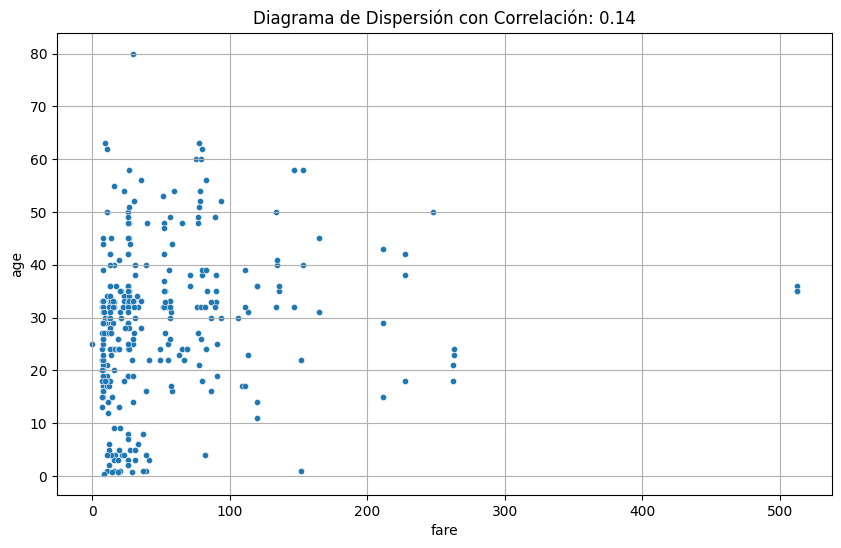

In [88]:
col_directora = "alive"
col_1 = "age"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [ ]:
# Cargamos el df
df_junio = pd.read_csv("./data/dataset_viajes_jun23.csv")

df_junio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


In [ ]:
# Mostramos el df
df_junio.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


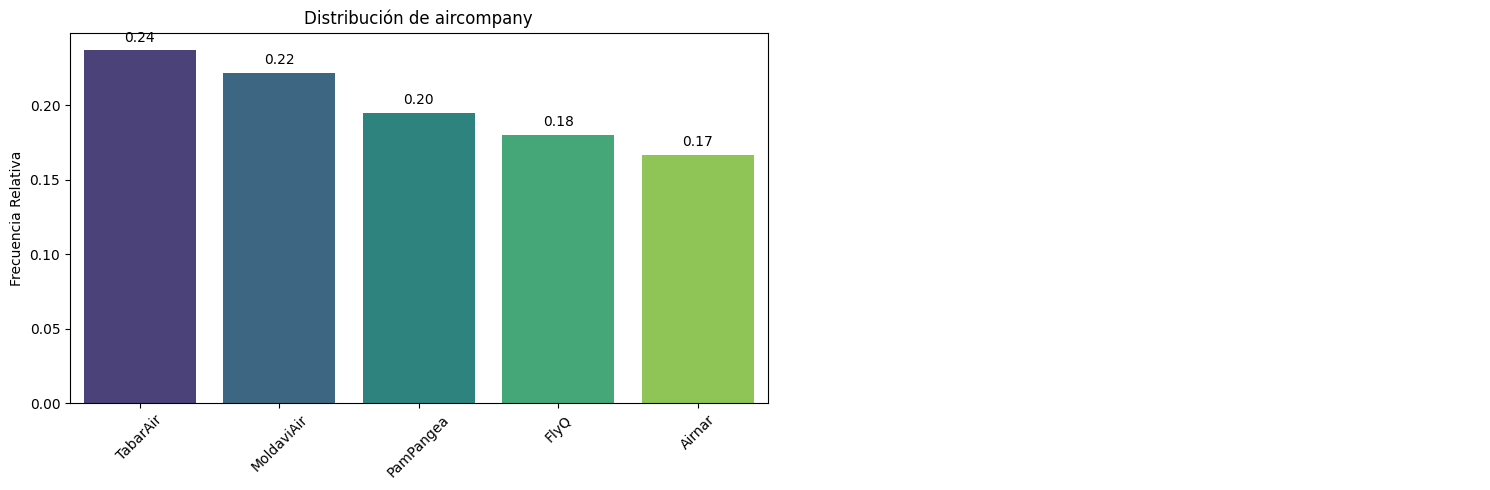

In [ ]:
# Vemos la distribución de viajes por compañía
pinta_distribucion_categoricas(df_junio,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


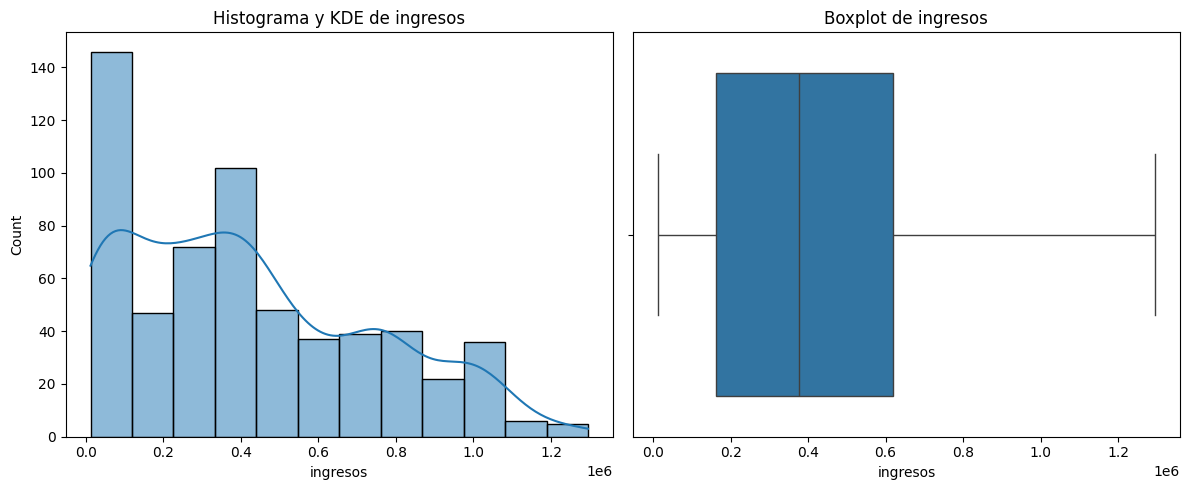

In [ ]:
# Vemos la distribución de los ingresos
plot_combined_graphs(df_junio,["ingresos"])

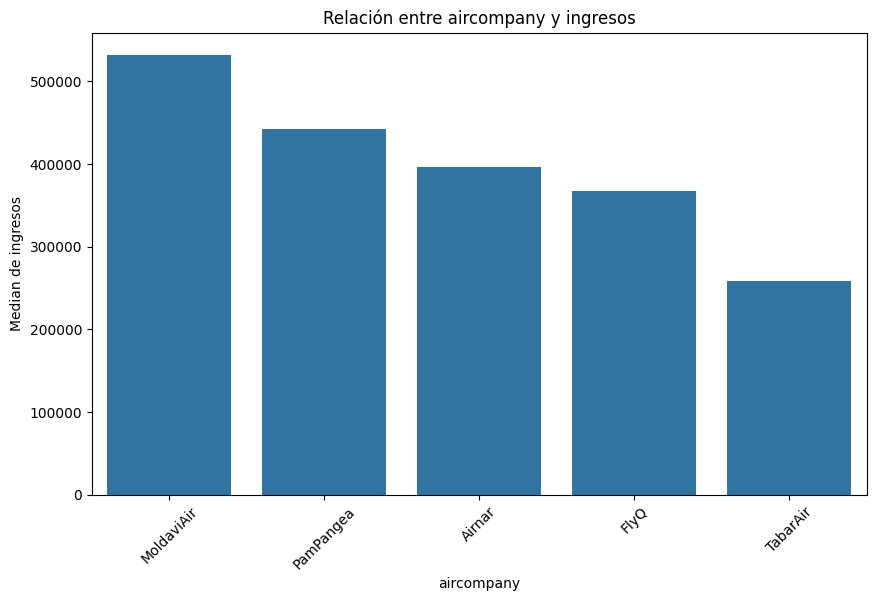

In [ ]:
# Vamos la relación entre ambas, ingresos por compañía
plot_categorical_numerical_relationship(df_junio, "aircompany","ingresos",measure="median") # Utilizando mediana

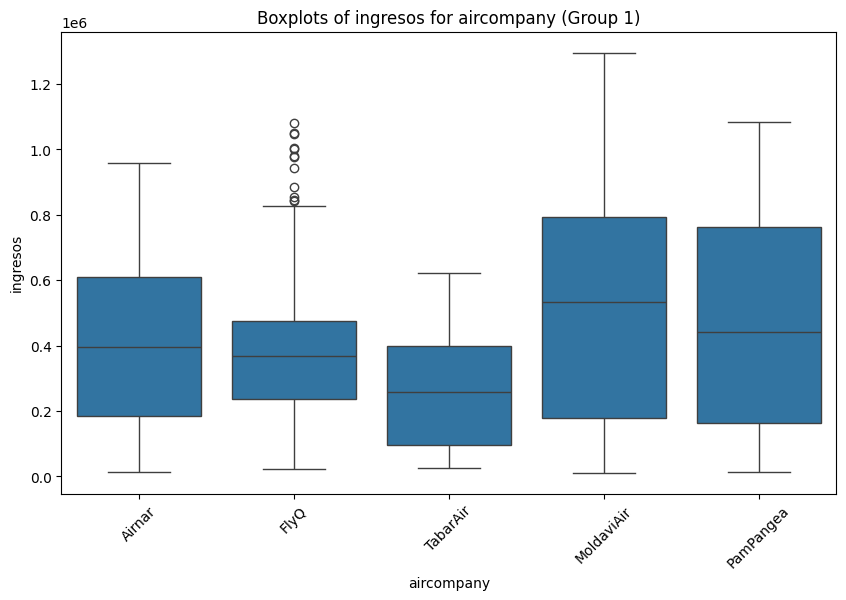

In [12]:
# Ahora vemos el boxplot de ingresos por compañía
plot_grouped_boxplots(df_junio,"aircompany","ingresos")

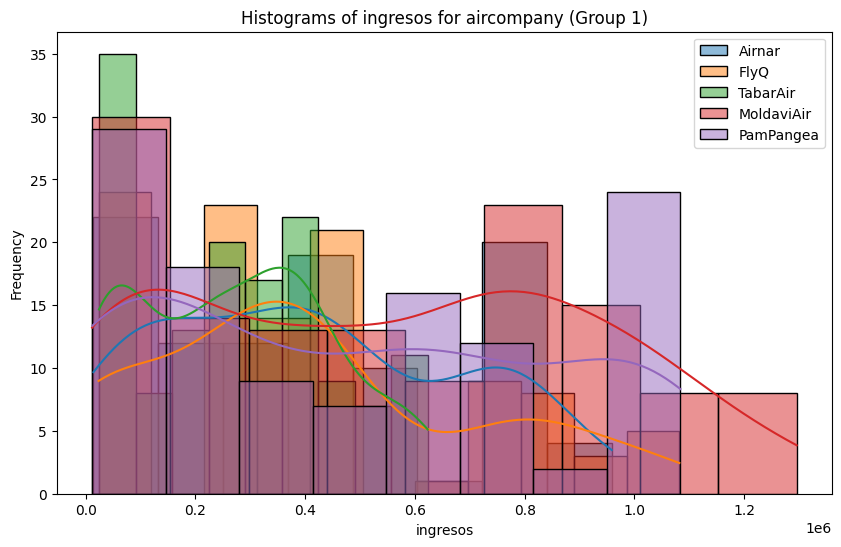

In [13]:
# Ahora vemos los histogramas agrupados
plot_grouped_histograms(df_junio,"aircompany", "ingresos", 5)

> TabarAir tiene más viajes y menos ingresos en mediana, menor rango de ingresos con un pico en vuelos de pocos ingresos. Debería tenerse en cuenta también las distancias de los vuelos y el consumo de los mismos...

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


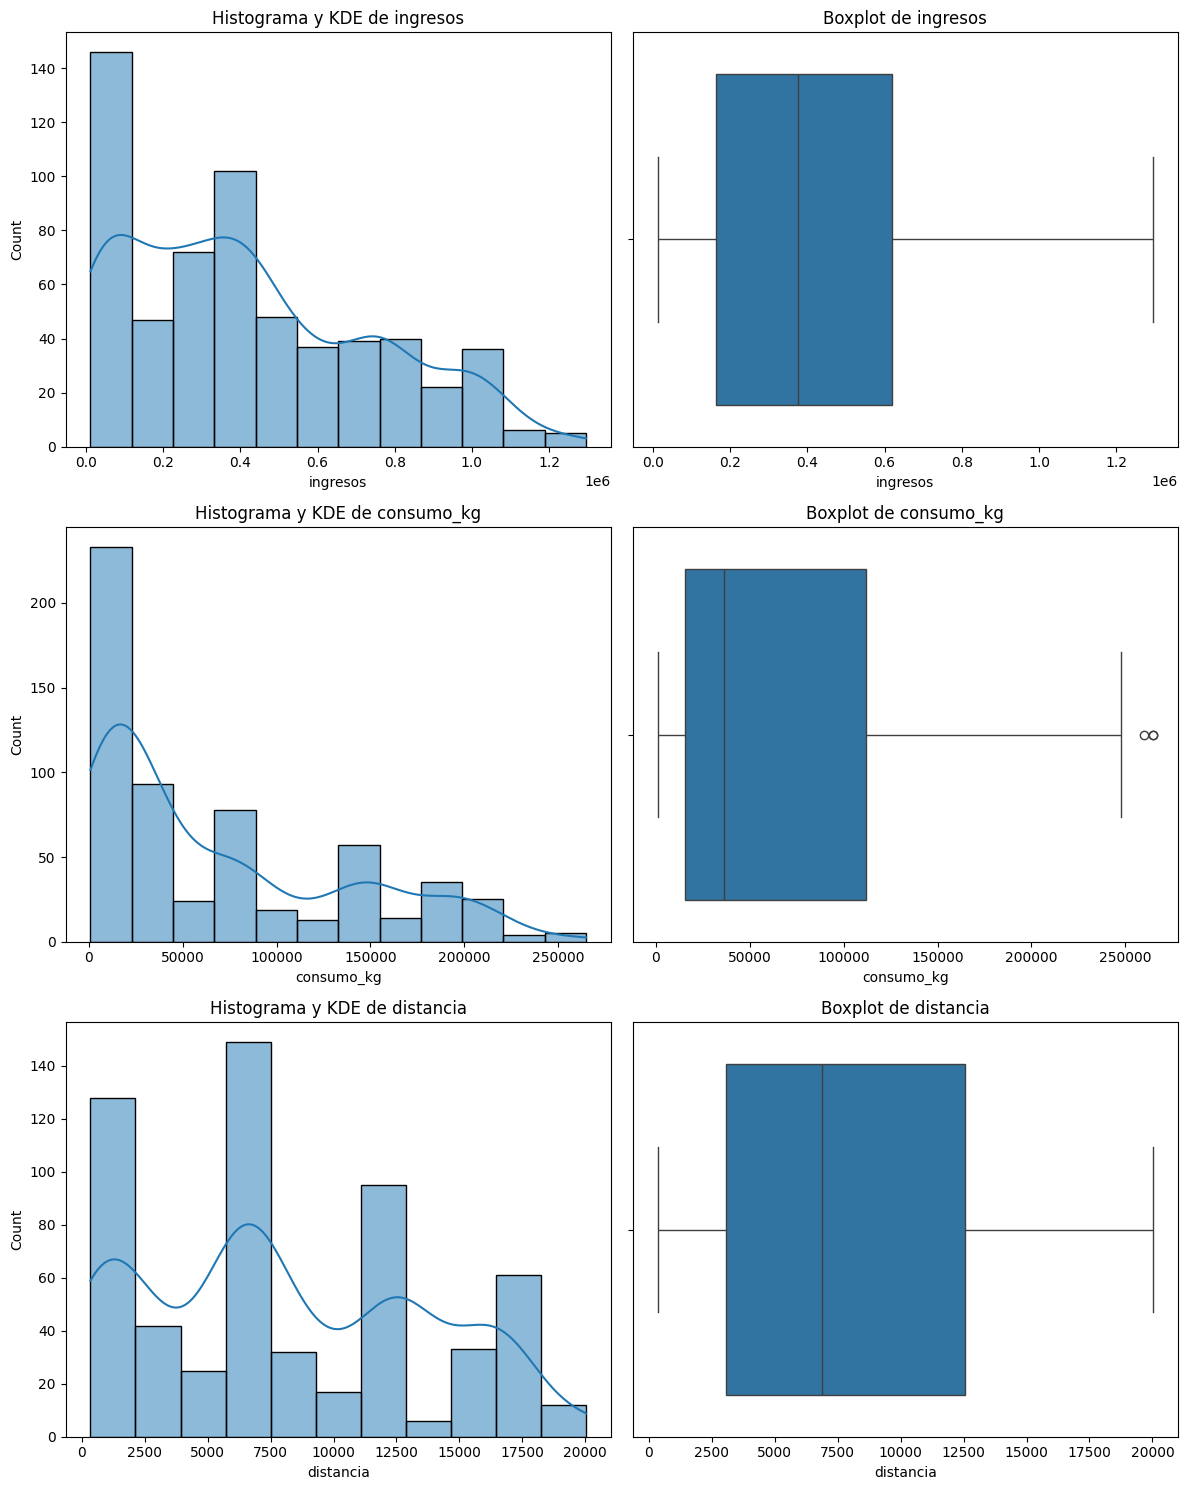

In [14]:
# Primero vemos las distribuciones por separado
plot_combined_graphs(df_junio,["ingresos","consumo_kg","distancia"])

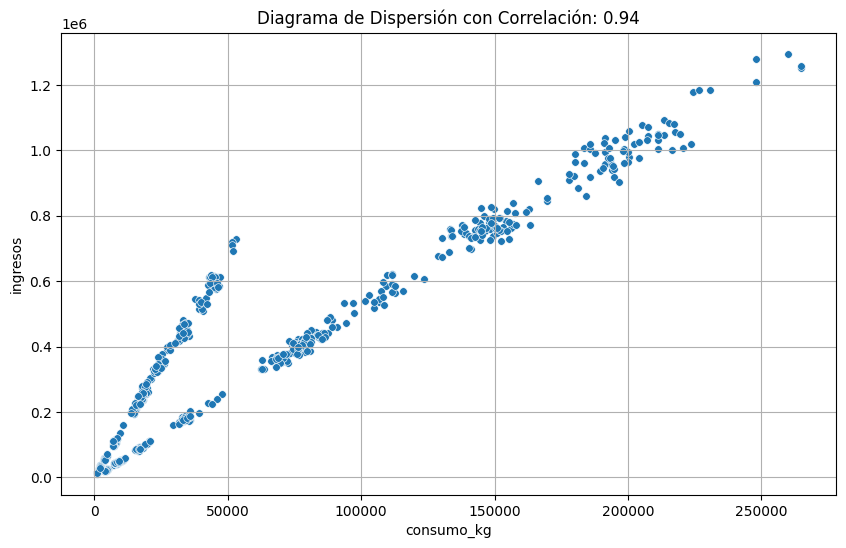

In [15]:
# Ahora las correlaciones dos a dos
grafico_dispersion_con_correlacion(df_junio,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

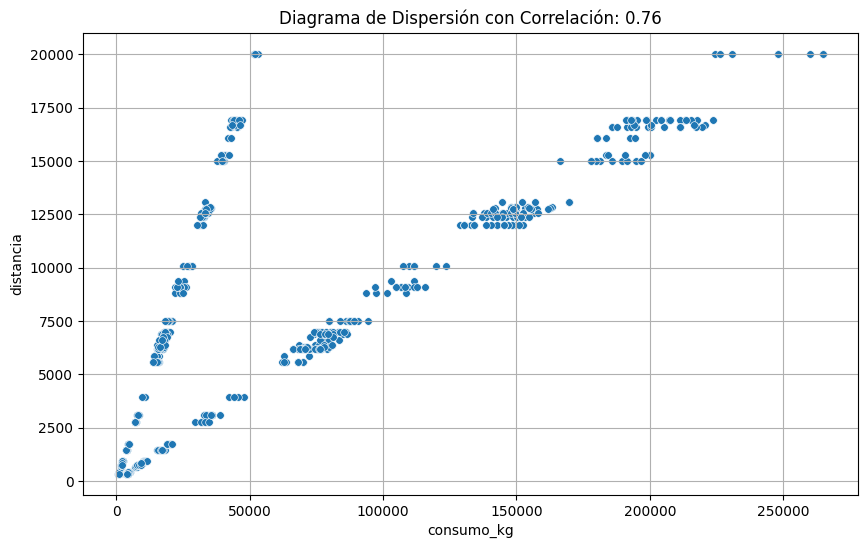

In [16]:
grafico_dispersion_con_correlacion(df_junio,"consumo_kg", "distancia", mostrar_correlacion= True, tamano_puntos= 30)

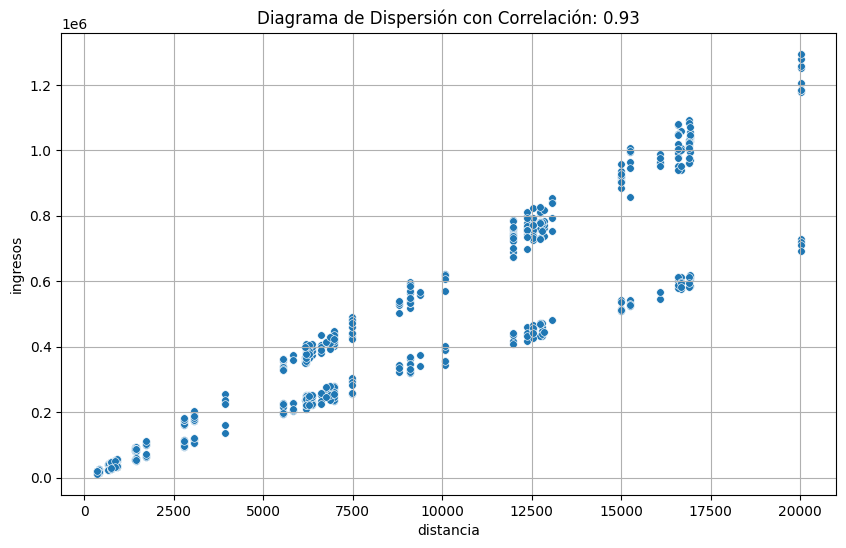

In [17]:
grafico_dispersion_con_correlacion(df_junio,"distancia", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

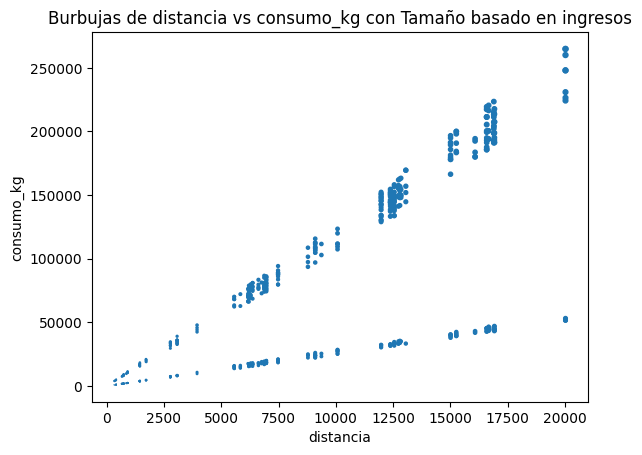

In [18]:
# Diagrama de burbujas para ver las tres variables a la vez
bubble_plot(df_junio,"distancia","consumo_kg","ingresos", scale = 100000)

El tamaño de las burbujas representa los ingresos, y se observa una correlación entre la distancia y el consumo. Sin embargo, destaca claramente una línea de vuelos mucho más eficientes. Además, si comparamos el tamaño de las burbujas entre estas dos líneas, parecen ser similares. Esto sugiere, y podría abrir una interesante línea de investigación, la existencia de un conjunto de viajes significativamente más eficientes en todos los aspectos en comparación con otros.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

<Axes: >

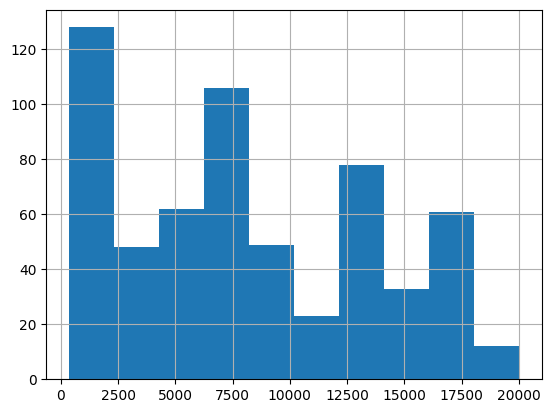

In [ ]:
# Vemos la distribución para ver en cuantas categorías podríamos separarlo
df_junio.distancia.hist()

In [ ]:
# Vamos a dividirlo en 4, de 5000 en 5000
df_junio["cat_vuelo"] = pd.cut(df_junio["distancia"], bins=[0, 5000, 10000, 15000, 21000], labels=['Corto', 'Medio', 'Largo', 'Muy largo'], right=False)
df_junio.cat_vuelo.value_counts(dropna=False)

cat_vuelo
Medio        204
Corto        176
Largo        114
Muy largo    106
Name: count, dtype: int64

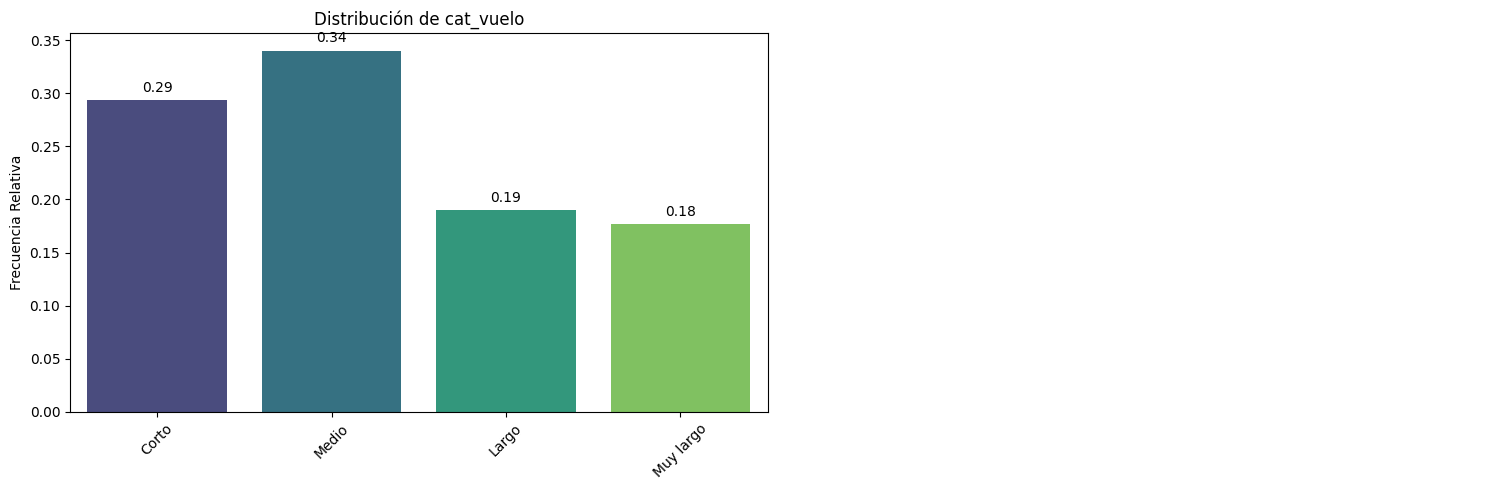

In [ ]:
# Analizamos la catregórica nueva, ingresos y consumo ya teníamos su distribucion individual
pinta_distribucion_categoricas(df_junio,["cat_vuelo"], relativa= True, mostrar_valores= True)

c:\Users\tebar\Documents\Bootcamp_DataScience_EDEM\Repo_Previo\Sprint 7\Unidad 2\bootcampviztools.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


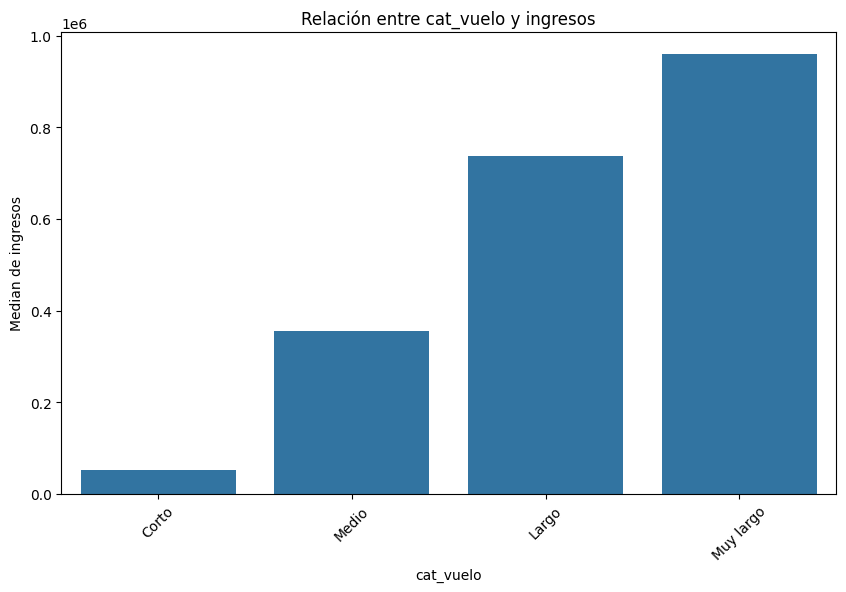

In [26]:
# Vamos la relación entre ambas, ingresos por categoria
plot_categorical_numerical_relationship(df_junio, "cat_vuelo","ingresos",measure="median")

c:\Users\tebar\Documents\Bootcamp_DataScience_EDEM\Repo_Previo\Sprint 7\Unidad 2\bootcampviztools.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


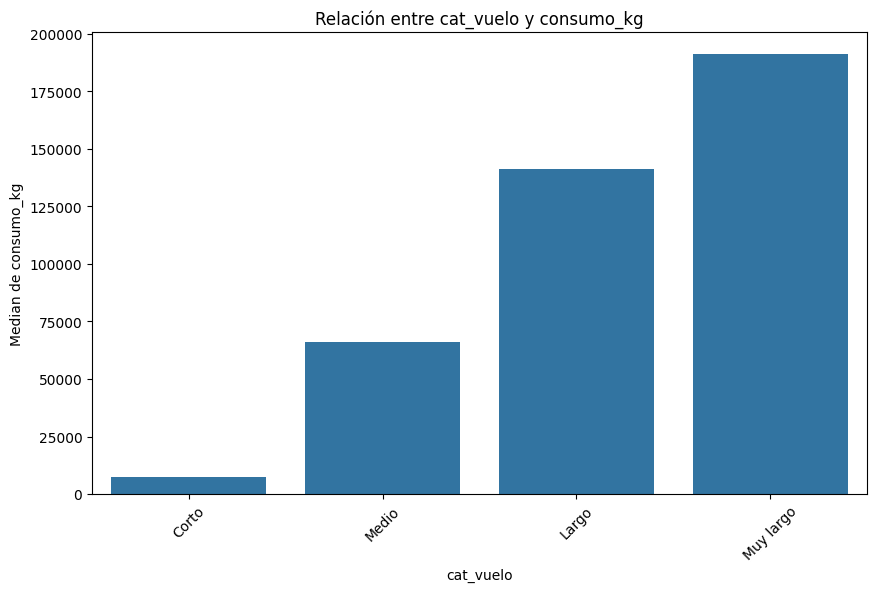

In [ ]:
# Vamos la relación entre ambas, consumo por categoria
plot_categorical_numerical_relationship(df_junio, "cat_vuelo","consumo_kg",measure="median")

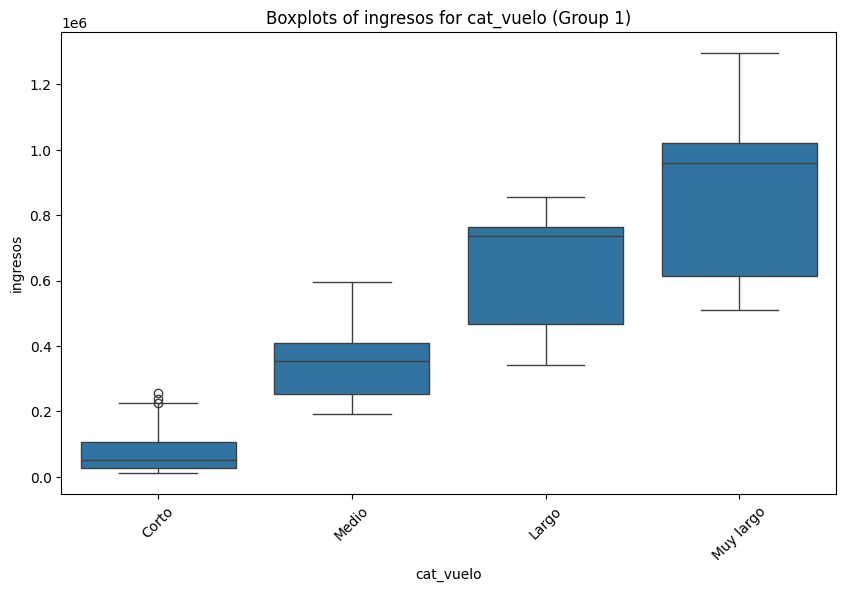

In [28]:
# Ahora vemos el boxplot de ingresos por categoria
plot_grouped_boxplots(df_junio,"cat_vuelo","ingresos")

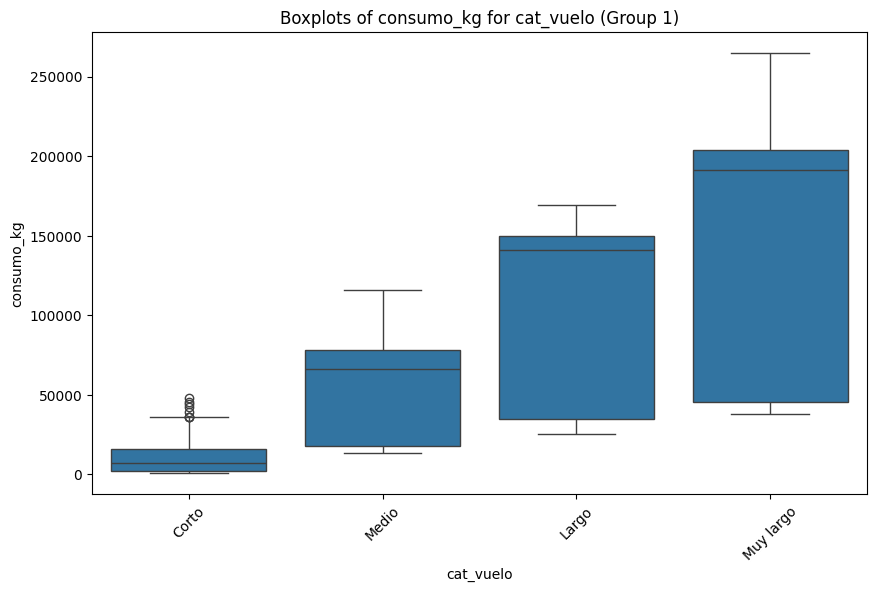

In [29]:
# Ahora vemos el boxplot de consumo por categoria
plot_grouped_boxplots(df_junio,"cat_vuelo","consumo_kg")

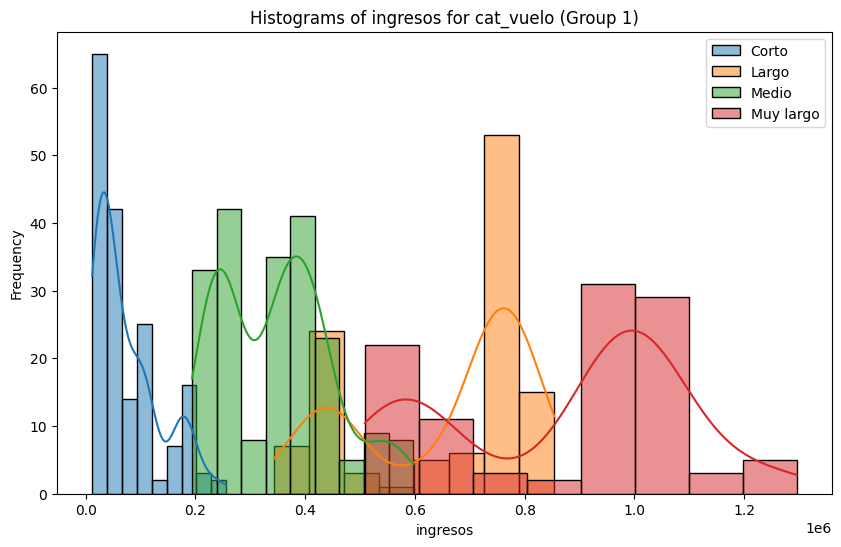

In [30]:
# Ahora vemos los histogramas agrupados
plot_grouped_histograms(df_junio,"cat_vuelo", "ingresos", 5)

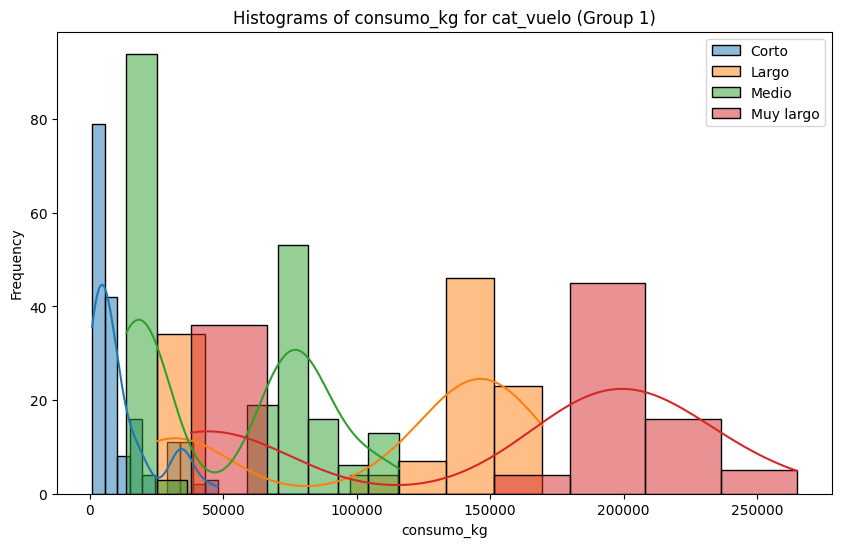

In [31]:
# Ahora vemos los histogramas agrupados
plot_grouped_histograms(df_junio,"cat_vuelo", "consumo_kg", 5)

In [32]:
# Ahora el analisis de las tres a la vez, primero separamos
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_junio[col_directora].unique():
    diccionario_multivariante[valor] = df_junio.loc[df_junio[col_directora] == valor,[col_2,col_1]] 

Respuesta Corto:


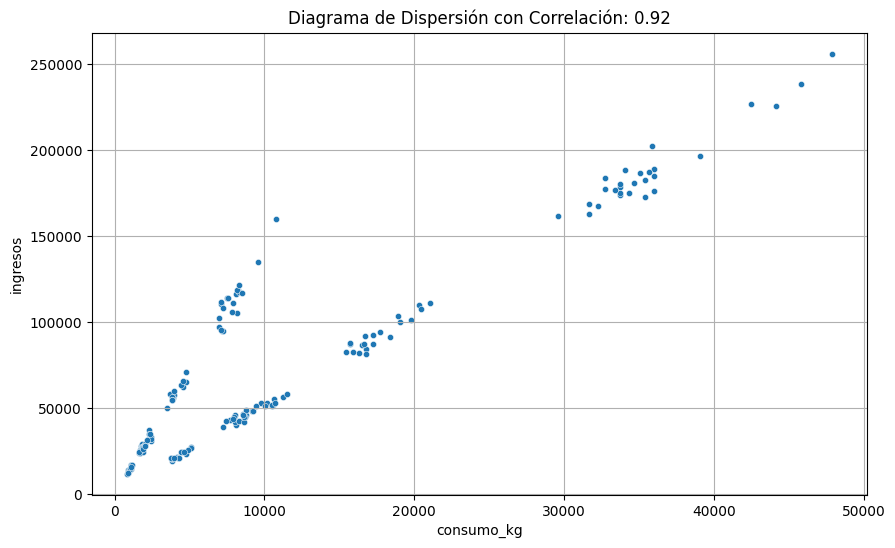

Respuesta Largo:


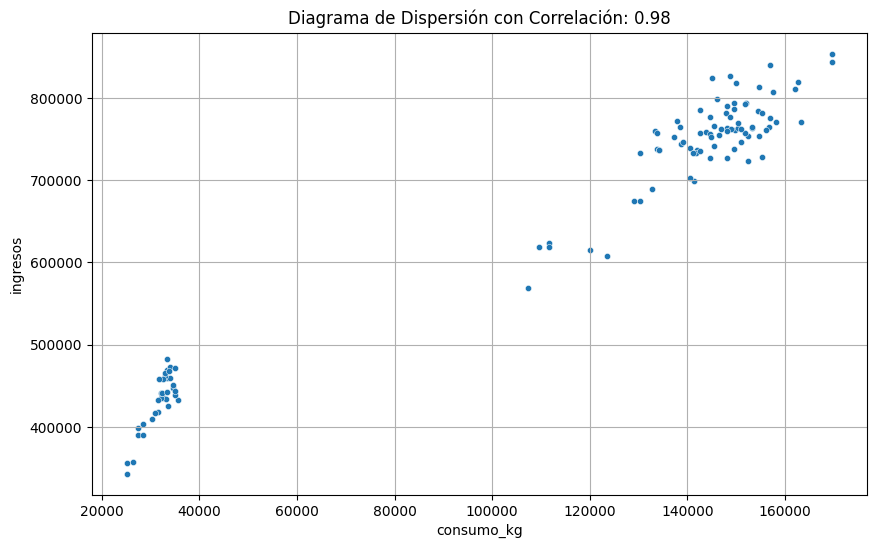

Respuesta Medio:


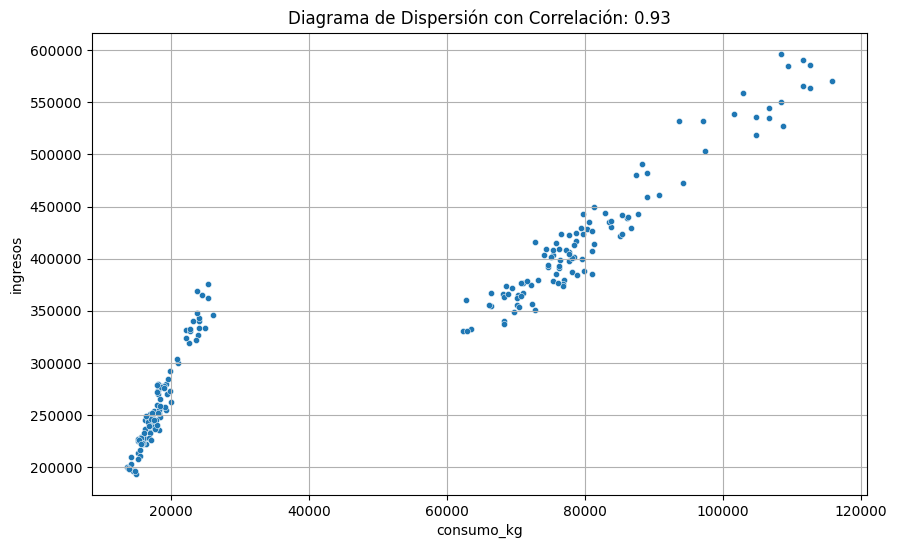

Respuesta Muy largo:


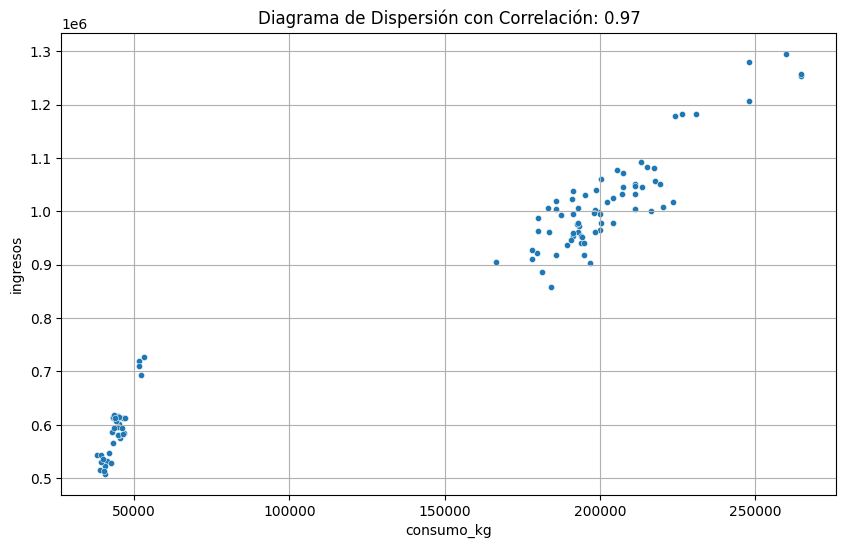

In [33]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [90]:
df_junio["ingreso_por_kg"] = df_junio["ingresos"]/df_junio["consumo_kg"]
df_junio["kg_por_km"] = df_junio["consumo_kg"]/df_junio["distancia"]

df_junio.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ingreso_por_kg,kg_por_km
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corto,13.835678,2.502900
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Largo,13.994604,2.628288
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Medio,5.343473,12.022400
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Medio,13.704256,2.673000
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Medio,5.092391,11.512800


In [91]:
df_junio.describe()

,distancia,consumo_kg,duracion,ingresos,ingreso_por_kg,kg_por_km
count,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,8071.003333,68240.520508,635.873333,4.187689e+05,8.904848,7.934756
std,5550.244086,67441.849592,450.474786,3.182858e+05,4.407691,4.537013
min,344.000000,835.920000,42.000000,1.179785e+04,4.554666,2.430000
25%,3073.000000,15733.520400,224.000000,1.627668e+05,5.131672,2.660600
50%,6877.000000,36033.998000,542.000000,3.754817e+05,5.459427,11.086400
75%,12553.000000,111717.652800,876.000000,6.188420e+05,13.855693,11.906800
max,20029.000000,264876.314560,1721.000000,1.295516e+06,16.213469,13.224640


(2, 2)


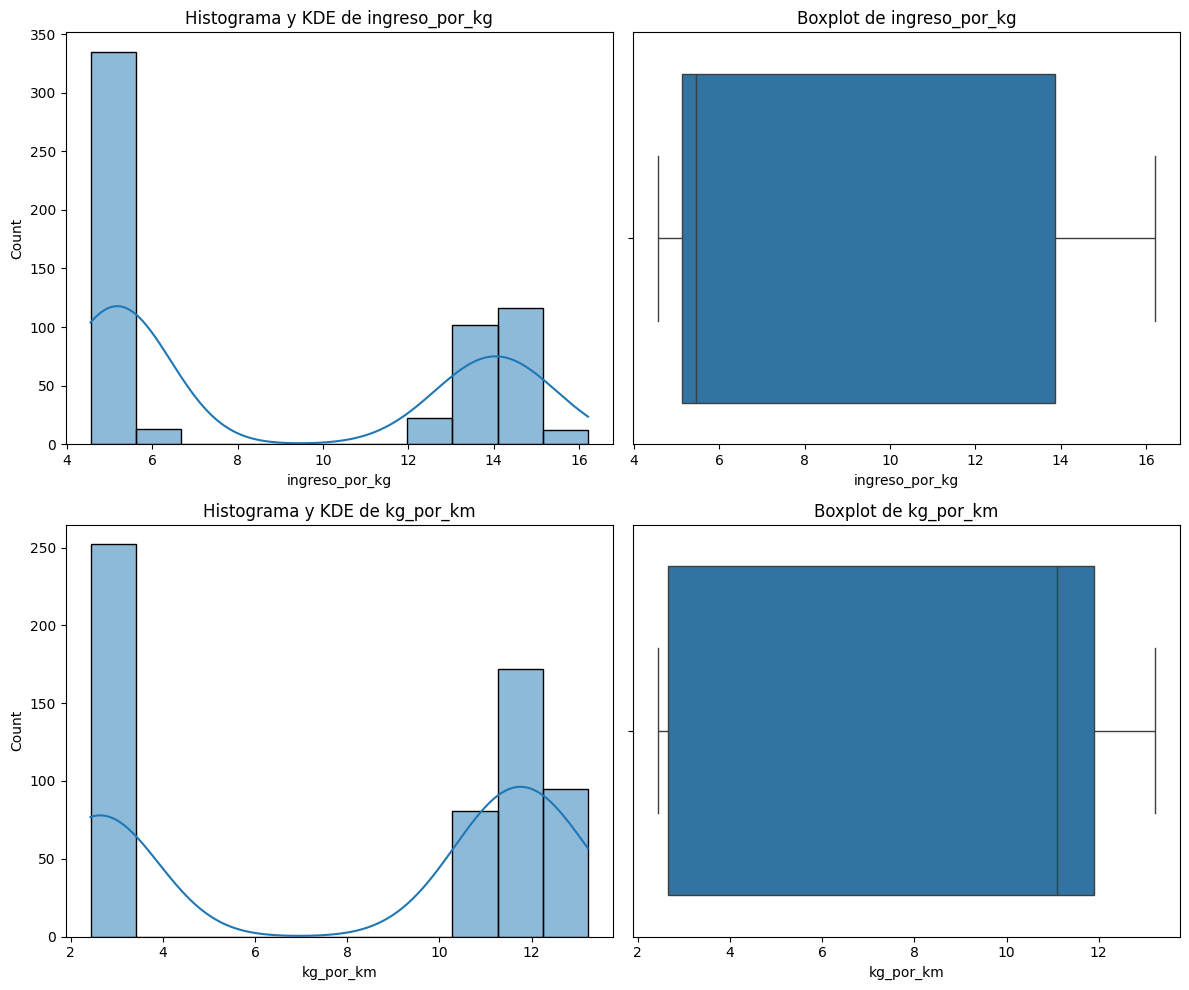

In [92]:
plot_combined_graphs(df_junio,columns = ["ingreso_por_kg","kg_por_km"])

In [102]:
# usando la media, separamos en eficiente y no eficiente
mean_col1 = df_junio["ingreso_por_kg"].mean()
mean_col2 = df_junio["kg_por_km"].mean()

# Crear una nueva columna con 0 o 1 según la condición
df_junio["eficiencia"] = ((df_junio["ingreso_por_kg"] > mean_col1) & (df_junio["kg_por_km"] < mean_col2))

df_junio.eficiencia.value_counts()


eficiencia
False    348
True     252
Name: count, dtype: int64

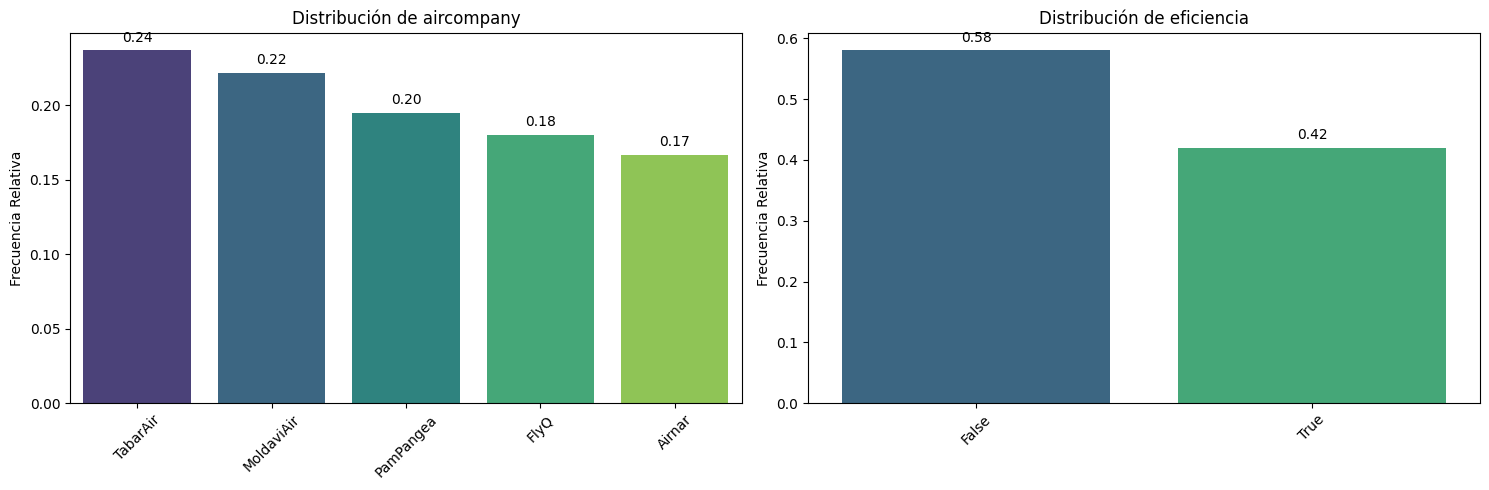

In [103]:
pinta_distribucion_categoricas(df_junio,["aircompany","eficiencia"], relativa= True, mostrar_valores= True)

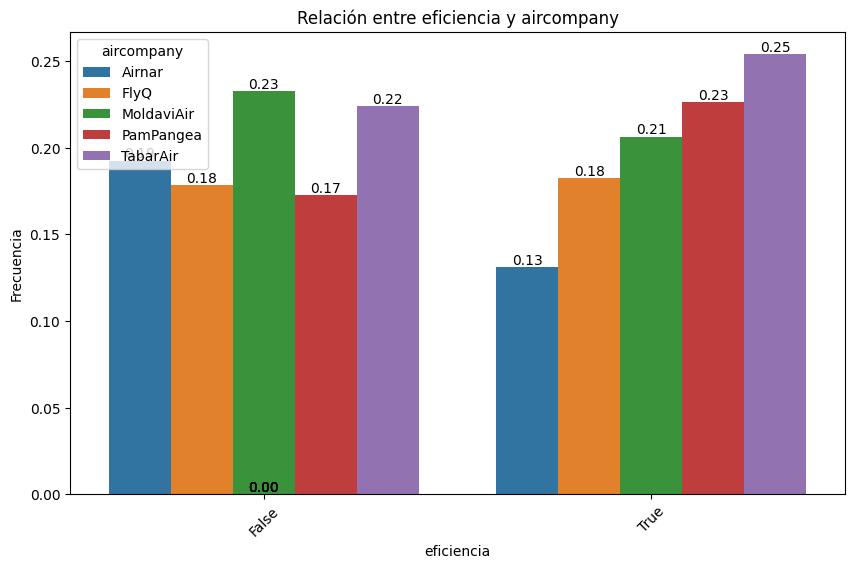

In [104]:
plot_categorical_relationship_fin(df_junio, "eficiencia","aircompany", relative_freq = True, show_values = True)

Como se puede ver, TabarAir tiene más vuelos eficientes que el resto, y más que ineficientes.

In [105]:
tabla_contingencia = pd.crosstab(df_junio['aircompany'], df_junio['eficiencia'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 6.517737487798628
P-Value: 0.1636762034569761
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[58.   42.  ]
 [62.64 45.36]
 [77.14 55.86]
 [67.86 49.14]
 [82.36 59.64]]
